In [ ]:
##Librerias para análisis estadistico y matemático
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
import seaborn as sns ##Histograms
from numpy import logspace
import sympy as sym
import numpy as np
from scipy.optimize import minimize

In [ ]:
#!pip install lcapy
#!pip install folium==0.2.1
#!pip install pdflatex
#!sudo apt-get install texlive-latex-recommended 
#!sudo apt install texlive-latex-extra
#!sudo apt install dvipng

!pip install lcapy
from lcapy import Circuit, j, omega, s

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.0/410.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.9 MB/s eta 0:00:00


In [ ]:
ctt=Circuit(
'''
    Vi 1 0_1 step; down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    C2 2 3; right, size=1.5
    R3 2 3; right, offset=0.7
    R2 3 0_3; down
    W 0_1 0; right
    W 0 0_3; right
'''
)

#ctt.draw()

In [ ]:
#@title 3.1) Función de transferencia

In [ ]:
H=(ctt.R2.V(s)/ctt.Vi.V(s)).simplify()
H

                            C₁⋅R₁⋅R₂⋅s⋅(C₂⋅R₃⋅s + 1)                          
──────────────────────────────────────────────────────────────────────────────
                2                                                             
C₁⋅C₂⋅R₁⋅R₂⋅R₃⋅s  + R₁ + R₂ + R₃ + s⋅(C₁⋅R₁⋅R₂ + C₁⋅R₁⋅R₃ + C₂⋅R₁⋅R₃ + C₂⋅R₂⋅R

  
──
  
₃)

In [ ]:
C1=4.7e-4
C2=4.7e-4
R1=1000
R2=2000
R3=500

In [ ]:
H_valores=H.subs('C1', C1).subs('C2', C2).subs('R1', R1).subs('R2',R2).subs('R3', R3)

Text(0, 0.5, 'Magnitud (dB)')

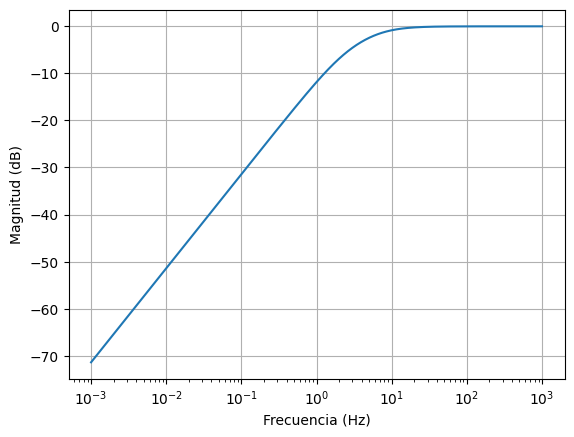

In [ ]:
W=logspace(-3,3,2000) ##GENERAMOS VECTOR DE FRECUENCIAS
X=H_valores(j*omega).dB.plot(W, log_frequency=True)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')

In [ ]:
##Usando LTI para simular en tiempo
Coeficientes_num=[C1*R1*R2*C2*R3,C1*R1*R2, 0]
Coeficientes_den=[C1*C2*R1*R2*R3, C1*R1*R2+C1*R1*R3+C2*R1*R3+C2*R2*R3, R1+R2+R3]

In [ ]:
#@title 3.2) Respuesta al impulso

In [ ]:
lti_system=lti(Coeficientes_num, Coeficientes_den)          #Simulando sistema slit 
N=4096          #Definiendo numero de muestras
t1, h=lti_system.impulse(N)              #obteneindo respuesta al impulso

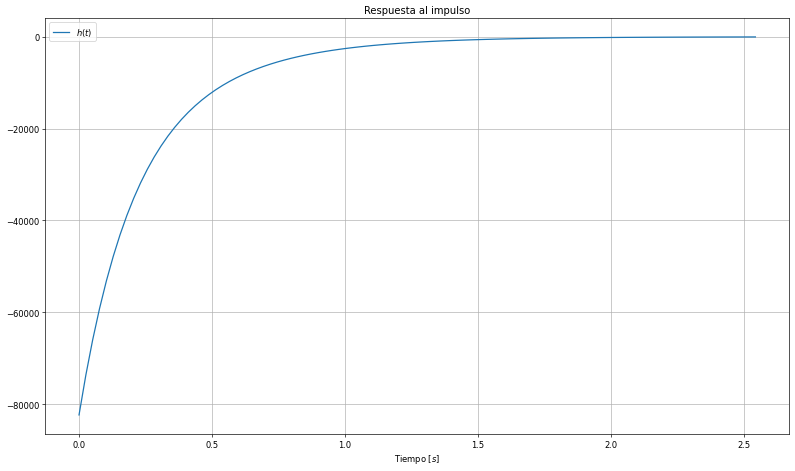

In [ ]:
plt.figure(figsize=(16,9), dpi=60)
plt.plot(t1,h, label='$h(t)$')
plt.grid(True)
plt.legend()
plt.title('Respuesta al impulso')
plt.xlabel('Tiempo [$s$]')
plt.show()

In [ ]:
# Definimos la función de log-verosimilitud
def log_likelihood(params, x):
    mu, sigma = params
    N = len(x)
    log_likelihood = -(N/2)*np.log(2*np.pi*sigma**2) - np.sum((x-mu)**2)/(2*sigma**2)
    return log_likelihood

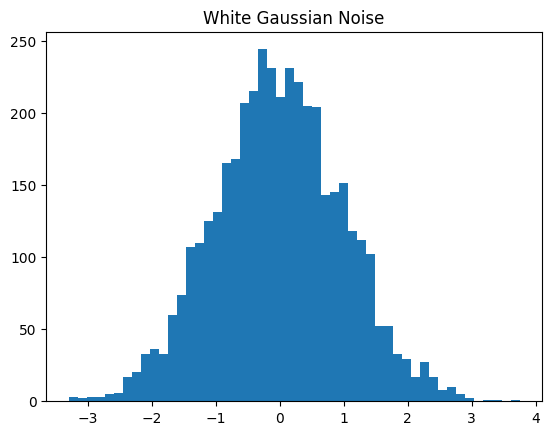

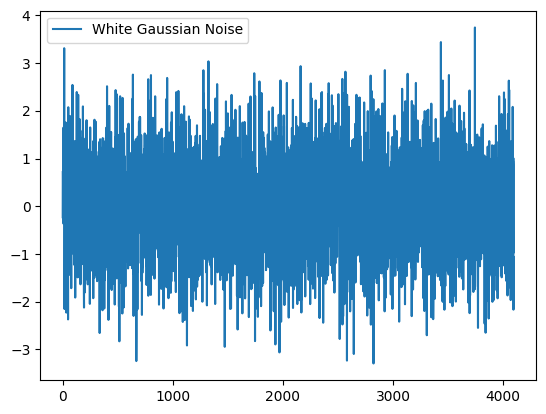

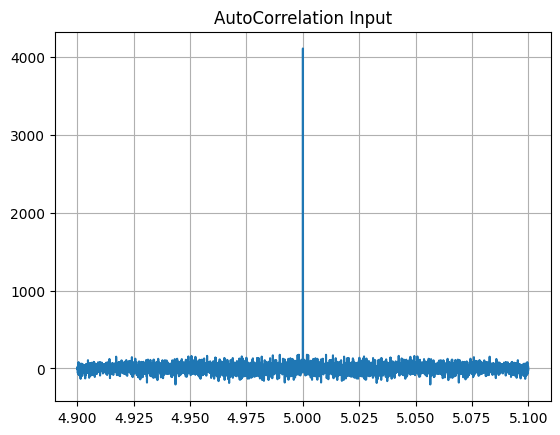

In [35]:
# Definimos la muestra de datos
mu, sigma = 0, 1 # media y desvio estandar
N=4096
t=np.linspace(4.90, 5.10, N)


WGN = np.random.normal(mu, sigma, N) #creando muestra de datos
plt.title(r'White Gaussian Noise')
plt.hist(WGN, 50)
plt.show()

plt.plot(WGN)
plt.legend(["White Gaussian Noise"])
plt.show()

Autocorrelacion_Gaussian=np.correlate(WGN,WGN,mode="same") ## GENERAMOS LA AUTOCORRELACION

plt.plot(t,Autocorrelacion_Gaussian)
#plt.xlim(-0.02,0.02)
hist_kws={"edgecolor":"balck"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()

In [ ]:
# Definimos la función a minimizar (el negativo de la función de log-verosimilitud)
def neg_log_likelihood(params, x):
    return -log_likelihood(params, x)

# Minimizamos la función de neg-log-verosimilitud para obtener los parámetros óptimos
result = minimize(neg_log_likelihood, [1, 1], args=(WGN,))
mu_optimo, sigma_optimo = result.x

print("Los parámetros óptimos son: mu = ", mu_optimo, " sigma = ", sigma_optimo)

Los parámetros óptimos son: mu =  0.017418116677817844  sigma =  1.0011781099323902


(array([  1.,   0.,   0.,   1.,   5.,   3.,   9.,   9.,  15.,  20.,  17.,
         25.,  35.,  46.,  65.,  86., 117., 124., 148., 145., 159., 188.,
        208., 233., 232., 221., 233., 199., 191., 199., 192., 180., 154.,
        109.,  96.,  90.,  77.,  61.,  60.,  35.,  32.,  25.,  19.,  11.,
          4.,   6.,   4.,   3.,   2.,   2.]),
 array([-3.56934764, -3.4304288 , -3.29150995, -3.1525911 , -3.01367226,
        -2.87475341, -2.73583456, -2.59691572, -2.45799687, -2.31907802,
        -2.18015918, -2.04124033, -1.90232149, -1.76340264, -1.62448379,
        -1.48556495, -1.3466461 , -1.20772725, -1.06880841, -0.92988956,
        -0.79097071, -0.65205187, -0.51313302, -0.37421417, -0.23529533,
        -0.09637648,  0.04254236,  0.18146121,  0.32038006,  0.4592989 ,
         0.59821775,  0.7371366 ,  0.87605544,  1.01497429,  1.15389314,
         1.29281198,  1.43173083,  1.57064967,  1.70956852,  1.84848737,
         1.98740621,  2.12632506,  2.26524391,  2.40416275,  2.5430816 ,
 

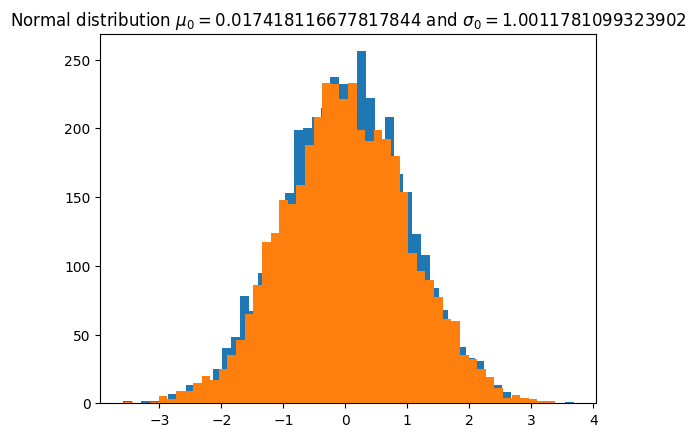

In [ ]:
GaussEst=np.random.normal(mu_optimo, sigma_optimo, N)
plt.title(f"Normal distribution $\mu_0 = {mu_optimo}$ and $\sigma_0 = {sigma_optimo}$")
plt.hist(GaussEst, 50)
plt.hist(WGN, 50)

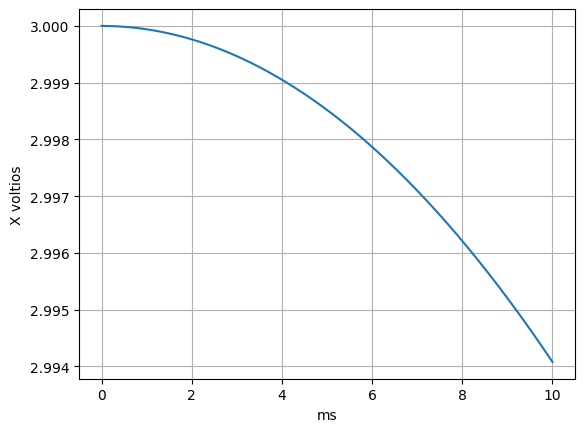

In [ ]:
#SISTEMAS Y SEÑALES 
#Gráfica 1 Xa(t)=3xcos(200πt)

#TIEMPO CONTINUO
Frec_Des=0.001
t=np.linspace(0, 10, N)
xa=3*np.cos(2*np.pi*Frec_Des*t)#La señal continúa  
#xb=
#plt.axis([0, 10, -4, 4]) #Definir los ejes de coordenadas 
                        #axis([xmin, xmax, ymin, ymax])
plt.ylabel("X voltios") #Nombre del eje y 
plt.xlabel("ms") #Nombre del eje x 
plt.plot(t,xa) #Gráfica de la señal con el tiempo en milisegundos
plt.grid() #Poner cuadricula
plt.show()

Text(0.5, 0, 'Time')

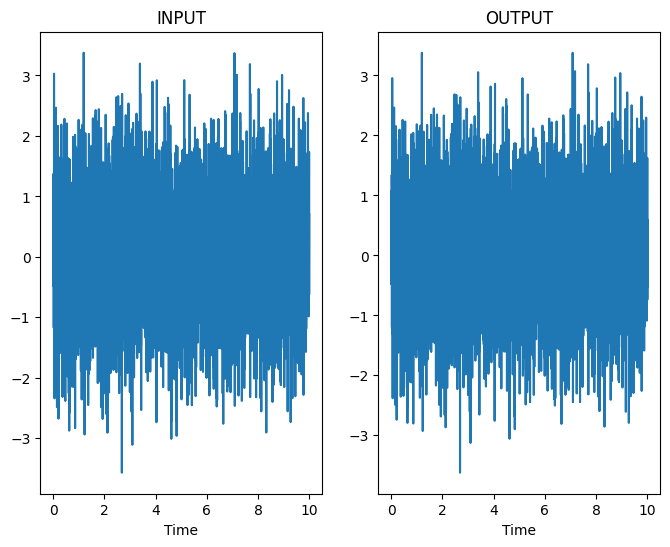

In [ ]:
##INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
_,Output_Circuit,_=lti_system.output(WGN, t) ##SALIDA DEL CIRCUITO.

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(8,6))
axs[0].plot(t, WGN)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

(array([  1.,   0.,   0.,   1.,   5.,   3.,   9.,   9.,  15.,  20.,  17.,
         25.,  35.,  46.,  65.,  86., 117., 124., 148., 145., 159., 188.,
        208., 233., 232., 221., 233., 199., 191., 199., 192., 180., 154.,
        109.,  96.,  90.,  77.,  61.,  60.,  35.,  32.,  25.,  19.,  11.,
          4.,   6.,   4.,   3.,   2.,   2.]),
 array([-3.56934764, -3.4304288 , -3.29150995, -3.1525911 , -3.01367226,
        -2.87475341, -2.73583456, -2.59691572, -2.45799687, -2.31907802,
        -2.18015918, -2.04124033, -1.90232149, -1.76340264, -1.62448379,
        -1.48556495, -1.3466461 , -1.20772725, -1.06880841, -0.92988956,
        -0.79097071, -0.65205187, -0.51313302, -0.37421417, -0.23529533,
        -0.09637648,  0.04254236,  0.18146121,  0.32038006,  0.4592989 ,
         0.59821775,  0.7371366 ,  0.87605544,  1.01497429,  1.15389314,
         1.29281198,  1.43173083,  1.57064967,  1.70956852,  1.84848737,
         1.98740621,  2.12632506,  2.26524391,  2.40416275,  2.5430816 ,
 

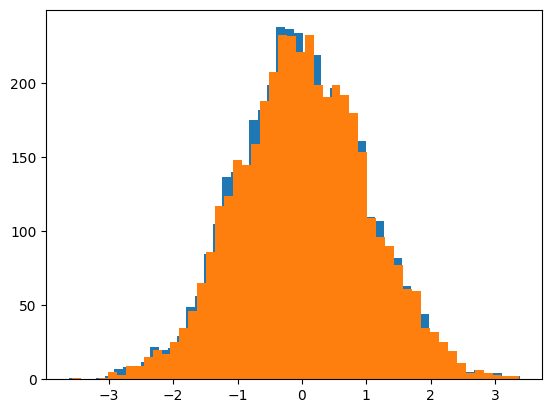

In [ ]:
plt.hist(Output_Circuit, 50)
plt.hist(WGN, 50)

El valor óptimo de mu es: 0.0027508728126847846
El valor óptimo de sigma es: 0.9991629566865848


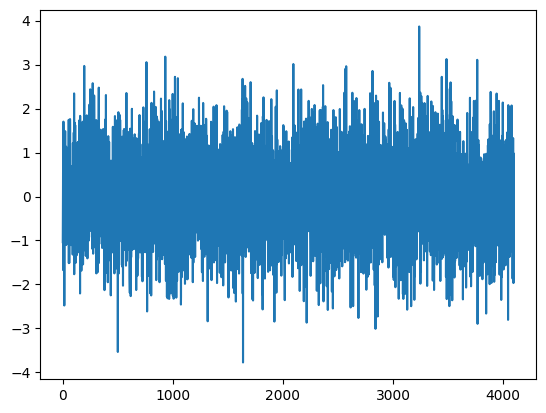

(array([  1.,   1.,   0.,   0.,   0.,   3.,   5.,   5.,   8.,  25.,  19.,
         24.,  39.,  60.,  73.,  93., 107., 125., 174., 162., 205., 254.,
        213., 264., 225., 273., 241., 233., 187., 209., 171., 173., 115.,
         93.,  80.,  71.,  48.,  29.,  35.,  16.,  17.,   6.,   4.,   2.,
          4.,   3.,   0.,   0.,   0.,   1.]),
 array([-3.77478179, -3.62193819, -3.46909459, -3.31625099, -3.16340739,
        -3.01056379, -2.85772019, -2.70487659, -2.55203299, -2.39918939,
        -2.24634579, -2.09350219, -1.94065859, -1.78781499, -1.63497139,
        -1.48212779, -1.32928419, -1.17644059, -1.02359699, -0.87075339,
        -0.71790979, -0.56506619, -0.41222259, -0.25937899, -0.10653539,
         0.04630821,  0.19915181,  0.35199541,  0.50483901,  0.65768261,
         0.81052621,  0.96336981,  1.11621341,  1.26905701,  1.42190061,
         1.57474421,  1.72758781,  1.88043141,  2.033275  ,  2.1861186 ,
         2.3389622 ,  2.4918058 ,  2.6446494 ,  2.797493  ,  2.9503366 ,
 

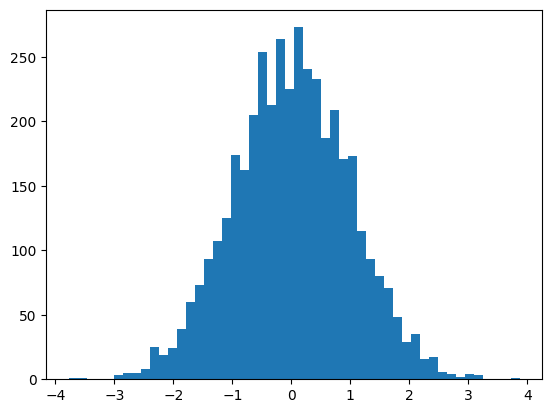

In [ ]:
# Minimizamos la función de neg-log-verosimilitud para obtener los parámetros óptimos
result = minimize(neg_log_likelihood, [1, 1], args=(Output_Circuit,))
mu_opti, sigma_opti = result.x

print("El valor óptimo de mu es:", mu_opti)
print("El valor óptimo de sigma es:", sigma_opti)

GaussEstOut = np.random.normal(mu_opti, sigma_opti, N)
plt.plot(GaussEstOut)
plt.show()
plt.hist(GaussEstOut,50)

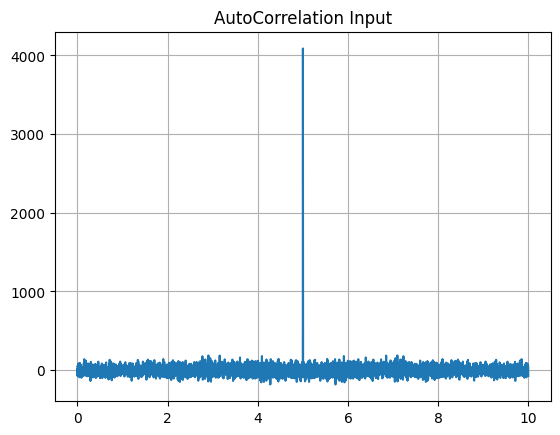

In [ ]:
Autocorrelacion_Gaussian1=np.correlate(Output_Circuit,Output_Circuit,mode="same") ## GENERAMOS LA AUTOCORRELACION

plt.plot(t,Autocorrelacion_Gaussian1)
#plt.xlim(-0.02,0.02)
hist_kws={"edgecolor":"balck"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()